<a href="https://colab.research.google.com/github/DSantanax/NewsAPI_Colab/blob/main/datapythonapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COVID 19 Keywords
# In this project we gather news articles using NEWSAPI and extract keywords by using the spacy npl then show a world cloud and save the data into a CSV file

# Install spaCy & newsapi-python

In [ ]:
!python --version
!pip install spacy
!pip install newsapi-python

Python 3.6.9


# Download the spaCy english language model (large size)

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=cd6a6668942be7df93db8220d7b35d4b29815ad79c16a97cb8ad5a3024283db3
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2ub6opn/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Import the libraries & load the data via variables

In [ ]:
import spacy
import newsapi
import en_core_web_lg

npl_eng = en_core_web_lg.load()
news_api = newsapi.NewsApiClient(api_key='5ee6ccc0bfab4eafba577bb59f924745')

# News API

In [ ]:
# use pickle to save data
import pickle

file_name = 'articlesCOVID.pckl'

# each call gets 20 pages
def pagination(number):
  temp = news_api.get_everything(q='coronavirus', language='en', from_param='2020-09-29', to='2020-10-27', sort_by='relevancy', page = number)
  return temp

# pass pagination reference and range 1-6 to get 100 pages JSON format info
articles = list(map(pagination, range(1,6)))


# Save the data

In [ ]:
# save data, this saves it in content folder
pickle.dump(articles, open(file_name, 'wb'))

# load data from content folder
loaded_model = pickle.load(open(file_name, 'rb'))

# save to google drive (dont need)
# file_path = '/content/articlesCOVID.pckl'
# pickle.dump(loaded_model, open(filepath, 'wb'))

# Show data & keys

In [ ]:
# articles is a list containing and object with key articles as a list which contains the info we need

# show articles data list its a JSON
# print(articles)

# show the keys of 1 article
# may need to be articles
print(article['articles'][0].keys())
# show all keys for the articles
# for article in articles:
#   print(article.keys())
#   for data in article['articles']:
#     print(data.keys())

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])


# Handle data & transform into dictionary of articles in a Pandas DataFrame

In [ ]:
import pandas as pd

# create empty list, that will contain the dict items
dados = []

# articles is a list containing the articles info for each
for _, article_info in enumerate(articles):
  for data_article_keys in article_info['articles']:
    title = data_article_keys['title']
    date = data_article_keys['publishedAt']
    description = data_article_keys['description']
    content = data_article_keys['content']
    dados.append({'title': title, 'date': date, 'desc': description, 'content': content})

# create a DataFrame
df = pd.DataFrame(dados)

# remove missing values if needed
df = df.dropna()

# returns only the first 5 rows as default
df.head()

,title,date,desc,content
0,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...
1,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...
2,"Twitter flags, limits sharing on Trump tweet a...",2020-10-11T19:11:34Z,Twitter disabled sharing options on a tweet fr...,The tweet violated the platforms rules against...
3,Coronavirus and Home Design,2020-10-22T13:00:08Z,A recent survey of architects reveals that cli...,The coronavirus pandemic is already shaping ho...
4,Coronavirus Briefing: What Happened Today,2020-10-12T22:12:24Z,What the near future may hold,Many leaders most notably President Trump have...


# Match keywords


In [ ]:
from string import punctuation

pos_tag = ['VERB', 'NOUN', 'PROPN']

def get_keywords_eng(text):
  result = []
  doc = npl_eng(text)

  for token in doc:
    if(token.text in npl_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)

  return result

# Apply function get_keywords_eng to dataframe's contents


In [ ]:
from collections import Counter
results = []

for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
df.head(10)

# save new table to pickle
# pickle.dump(df, open(file_name, 'wb'))

,title,date,desc,content,keywords
0,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...,"[#Mouthwash, #designed, #kill, #germs, #mouth]"
1,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...,"[#Navigating, #air, #travel, #pandemic, #want]"
2,"Twitter flags, limits sharing on Trump tweet a...",2020-10-11T19:11:34Z,Twitter disabled sharing options on a tweet fr...,The tweet violated the platforms rules against...,"[#tweet, #sharing, #violated, #platforms, #rules]"
3,Coronavirus and Home Design,2020-10-22T13:00:08Z,A recent survey of architects reveals that cli...,The coronavirus pandemic is already shaping ho...,"[#pandemic, #coronavirus, #shaping, #home, #de..."
4,Coronavirus Briefing: What Happened Today,2020-10-12T22:12:24Z,What the near future may hold,Many leaders most notably President Trump have...,"[#leaders, #President, #Trump, #described, #ar..."
5,Coronavirus Briefing: What Happened Today,2020-10-14T22:53:33Z,Startling fall surges in the United States and...,"In Europe, where a second wave is engulfing co...","[#Europe, #wave, #engulfing, #countries, #situ..."
6,Coronavirus Briefing: What Happened Today,2020-10-13T21:37:51Z,Congress tried to shield Covid-19 patients fro...,"Apoorva Mandavilli, who covers science and glo...","[#Apoorva, #Mandavilli, #covers, #science, #he..."
7,Coronavirus in N.Y.C.: Latest Updates,2020-10-06T09:37:51Z,The governor has refused to approve the mayor'...,"Since the season ended in October last year, C...","[#season, #ended, #October, #year, #Coney]"
8,Coronavirus Briefing: What Happened Today,2020-10-07T22:48:34Z,The virus is now devastating the U.S. Midwest ...,The 66-year-old Catholic priest was one of the...,"[#students, #priest, #invite, #return, #campus]"
9,Coronavirus Briefing: What Happened Today,2020-10-08T23:40:04Z,The coronavirus treatment President Trump prai...,"In New York City, the largest resurgence of th...","[#New, #York, #City, #resurgence, #virus]"


# Show data using world cloud

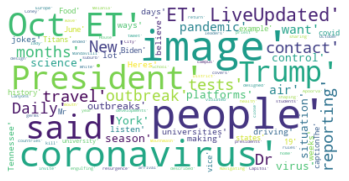

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
world_cloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save data using CSV

In [ ]:
file_path_name = 'covid_keywords.csv'
df.to_csv(file_path_name)

# Init git

In [37]:
!git init
!git config --global user.email "santana.danny4g@gmail.com"
!git config --global user.name "DSantanax"

Reinitialized existing Git repository in /content/.git/


In [24]:
!echo "# NewsAPI_Colab" >> README.md
!git add README.md
!git commit -m "first commit"

[main 370e10c] first commit
 1 file changed, 1 insertion(+)


In [59]:
# !git branch -M main
# !git remote add origin https://github.com/DSantanax/NewsAPI_Colab.git
# !git remote add origin github.com/DSantanax/NewsAPI_Colab.git
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date


In [40]:
!git branch -l
!ls -laF
!git remote show origin

* main
total 28
drwxr-xr-x 1 root root 4096 Nov  3 01:23 ./
drwxr-xr-x 1 root root 4096 Nov  3 01:09 ../
drwxr-xr-x 1 root root 4096 Oct 28 16:30 .config/
drwxr-xr-x 8 root root 4096 Nov  3 01:27 .git/
-rw-r--r-- 1 root root   32 Nov  3 01:23 README.md
drwxr-xr-x 1 root root 4096 Nov  3 01:21 sample_data/
* remote origin
  Fetch URL: https://github.com/DSantanax/NewsAPI_Colab.git
  Push  URL: https://github.com/DSantanax/NewsAPI_Colab.git
  HEAD branch: (unknown)


In [48]:
!git remote rm origin

fatal: No such remote: origin
